In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from  scipy.optimize import curve_fit
from  scipy.optimize import minimize
from functools import partial

In [19]:
df = pd.read_csv(r"C:\Users\Abhimkul\Downloads\SFHx)_Data_points")
energy = df.iloc[:,0].to_numpy()
Pressure = df.iloc[:,1].to_numpy()
df

,energy,Pressure
0,146.502707,0.991250
1,149.272780,1.101501
2,152.677989,1.192164
3,154.982229,1.301679
4,157.917191,1.421254
...,...,...
102,2543.137455,1336.454564
103,2640.941972,1396.491086
104,2752.896728,1459.224583
105,2837.273092,1511.434437


Text(0, 0.5, 'Pressure')

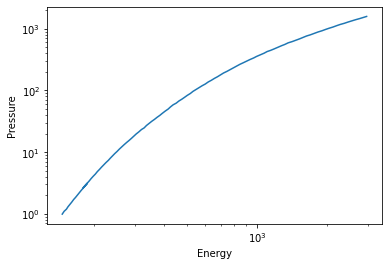

In [24]:
#Plotting the relation
plot.plot(energy,Pressure)
plot.xscale("log")
plot.yscale("log")
plot.xlabel("Energy")
plot.ylabel("Pressure")

C:\Users\Abhimkul\AppData\Local\Temp/ipykernel_27324/1083130704.py:9: RuntimeWarning: invalid value encountered in double_scalars
  k3 = p2/((p2/k2)**(1/GA2) + p2/(GA2-1) - p2/(GA3-1))**GA3


Text(0.5, 1.0, 'SFHx Poltrope fit')

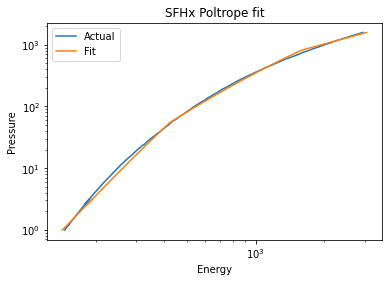

In [20]:
##Fitting using scipy.opitimize.minimize

p3 = 1579.331445
p0_1 = 0.991250 

def Curve_fit_polytrope(p, p1, p2, k1, GA1, GA2, GA3):
    
    k2 = p1/((p1/k1)**(1/GA1) + p1/(GA1-1) - p1/(GA2-1))**GA2
    k3 = p2/((p2/k2)**(1/GA2) + p2/(GA2-1) - p2/(GA3-1))**GA3

    condition1 = (p < p1)
    condition2 = (p >= p1) & (p < p2)
    condition3 = (p >= p2) 
    condition = [condition1, condition2, condition3]
    Polytrope1 = lambda p: (p/k1)**(1/GA1) + (p/(GA1-1))
    Polytrope2 = lambda p: (p/k2)**(1/GA2) + (p/(GA2-1))
    Polytrope3 = lambda p: (p/k3)**(1/GA3) + (p/(GA3-1))
    function_list = [Polytrope1 , Polytrope2 , Polytrope3]
    d = (np.piecewise(p, condition, function_list))
    
    return (d)


def driver_func(p,pdata,edata):
    energy_fit = Curve_fit_polytrope(pdata ,*p)
    energy_err = (np.sum(energy_fit - edata)**2)/len(edata)
    return energy_err


#Fitting 
p0 = [90,1300,0.00000001,1.59,1.7,1.6]

result = minimize(driver_func, p0, args=((Pressure), (energy)), method ='Nelder-Mead' )
coeffs = result.x
coeffs

#Plotting
plot.plot(energy,Pressure ,label = "Actual")
plot.plot(Curve_fit_polytrope(Pressure,*coeffs),Pressure,  label = "Fit")
plot.xscale("log")
plot.yscale("log")
plot.legend()
plot.xlabel("Energy") 
plot.ylabel("Pressure")
plot.title("SFHx Poltrope fit")

In [23]:
#Values of Coefficients
coeffs

array([5.49490219e+01, 8.13601224e+02, 4.80277404e-09, 3.85992626e+00,
       2.62551522e+00, 1.52897461e+00])